In [1]:
%load_ext autoreload
%autoreload 2

In [85]:
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [86]:
df = pd.DataFrame(index = range(36*11*3), columns = ['dataset', 'k', 'global complexity', 'higher complexity', 'lower complexity', 'metric', 'score'])

i = 0

for experiment in [
'a9a',
'appendicitis',
'australian',
'backache',
'banknote',
'breastcancer',
'bupa',
'cleve',
'cod-rna',
'colon-cancer',
'diabetes',
'flare',
'fourclass',
'german_numer',
'haberman',
'heart',
'housevotes84',
'ilpd',
'ionosphere',
'kr_vs_kp',
'liver-disorders',
'mammographic',
'mushroom',
'r2',
'sonar',
'splice',
'svmguide1',
'svmguide3',
'transfusion',
'w1a',
'w2a',
'w3a',
'w4a',
'w5a',
'w6a',
'w7a',
'w8a'
]:
    
    with open(f'../results/sensitivity/{experiment}.json', 'r') as fin:
        exp = json.load(fin)
        
    with open(f'../results/errors/{experiment}.json', 'r') as fin:
        error = json.load(fin)
    
    for j in range(1, 8):
        for mc in ['kdn', 'dynamic_kdn', 'dynamic_kdn_full_zone']:
            df.loc[i, 'score'] = error[experiment]['test']['score']
            df.loc[i, 'recall'] = error[experiment]['test']['tp']/error[experiment]['test']['positives']
            df.loc[i, 'dataset'] = experiment
            df.loc[i, 'k'] = j
            df.loc[i, 'metric'] = mc
            df.loc[i, 'global complexity'] = exp[experiment][str(j)][mc]['global']
            df.loc[i, 'higher complexity'] = max(exp[experiment][str(j)][mc]['class 0'], exp[experiment][str(j)][mc]['class 1'])
            df.loc[i, 'lower complexity'] = min(exp[experiment][str(j)][mc]['class 0'], exp[experiment][str(j)][mc]['class 1'])
            i += 1
df['global absolute score difference'] = df['score'] - (1 - df['global complexity'])
df['higher absolute score difference'] = df['score'] - (1 - df['higher complexity'])
df['lower absolute score difference'] = df['score'] - (1 - df['lower complexity'])
df['global complexity score'] = 1 - df['global complexity']
df['higher complexity score'] = 1 - df['higher complexity']
df['lower complexity score'] = 1 - df['lower complexity']
df['global absolute recall difference'] = df['recall'] - (1 - df['global complexity'])
df['higher absolute recall difference'] = df['recall'] - (1 - df['higher complexity'])
df['lower absolute recall difference'] = df['recall'] - (1 - df['lower complexity'])

In [87]:
for col in ['global complexity', 'higher complexity',
       'lower complexity', 'score',
       'global absolute score difference', 'higher absolute score difference',
       'lower absolute score difference', 'global complexity score',
       'higher complexity score', 'lower complexity score']:
    df[col] = df[col].astype(float)

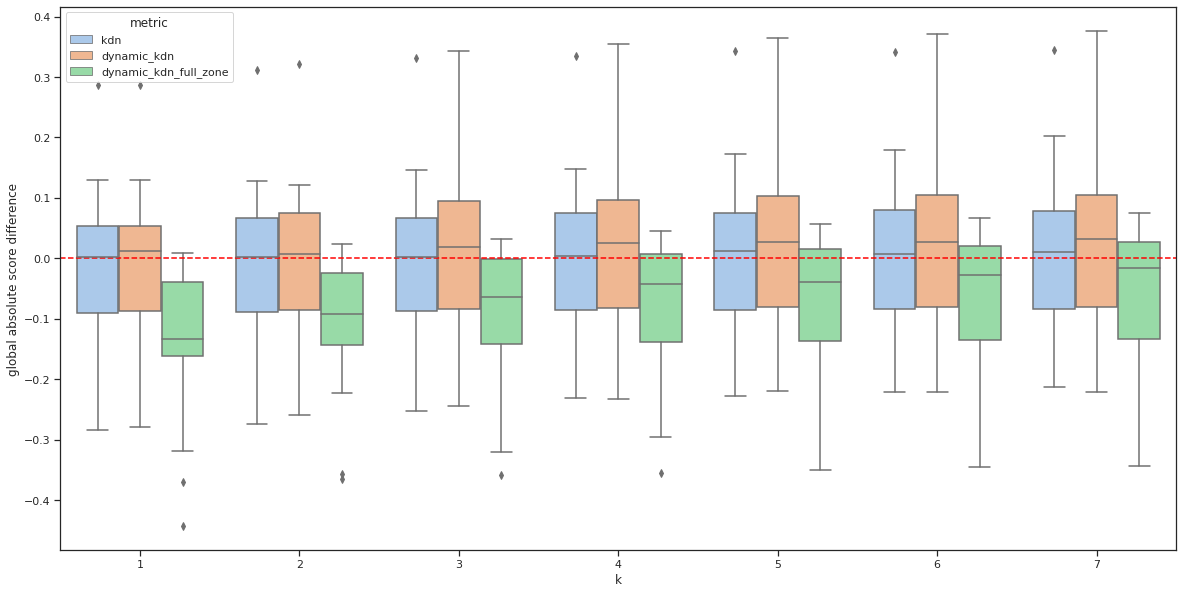

In [88]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=df, x="k", y="global absolute score difference", hue="metric")
plt.axhline(0, ls='--', c='red');

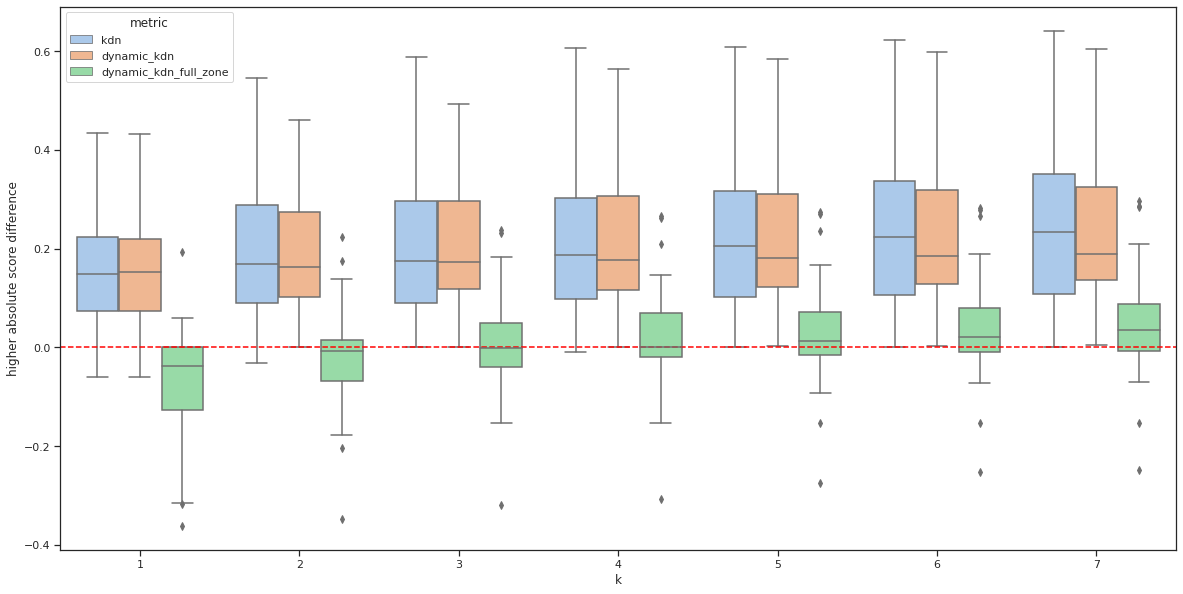

In [89]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=df, x="k", y="higher absolute score difference", hue="metric")
plt.axhline(0, ls='--', c='red');

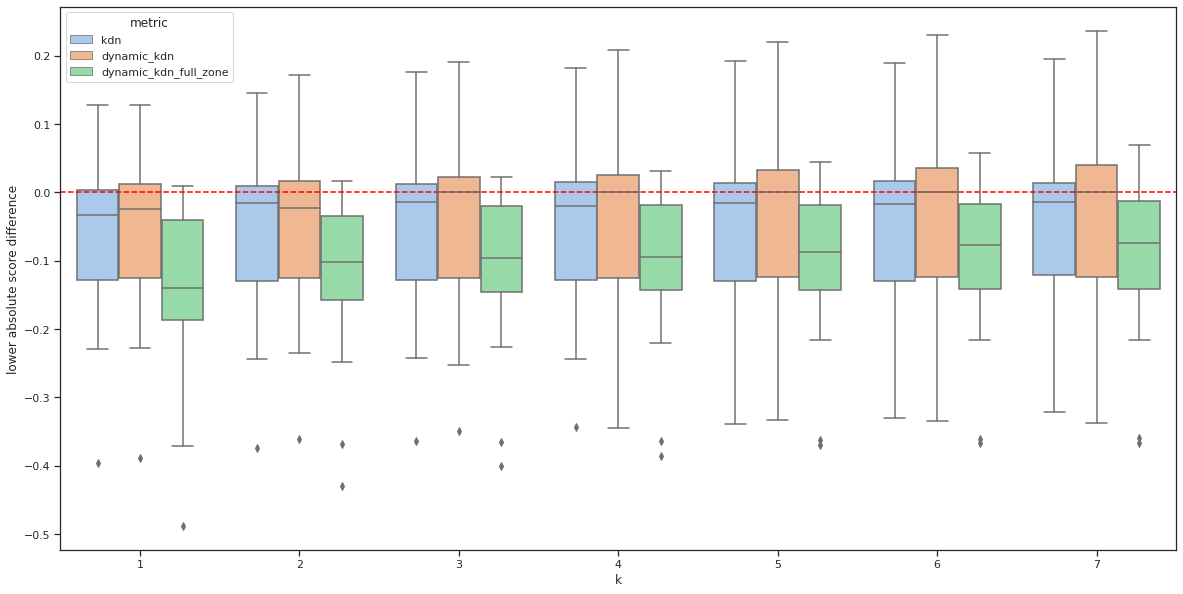

In [90]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=df, x="k", y="lower absolute score difference", hue="metric")
plt.axhline(0, ls='--', c='red');

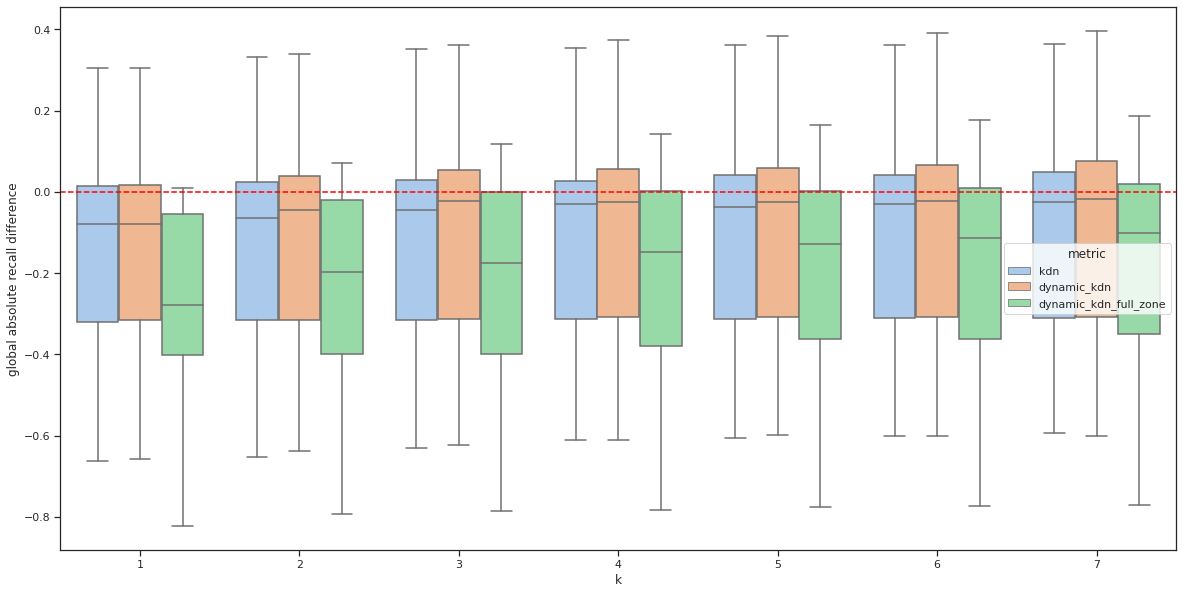

In [91]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=df, x="k", y="global absolute recall difference", hue="metric")
plt.axhline(0, ls='--', c='red');

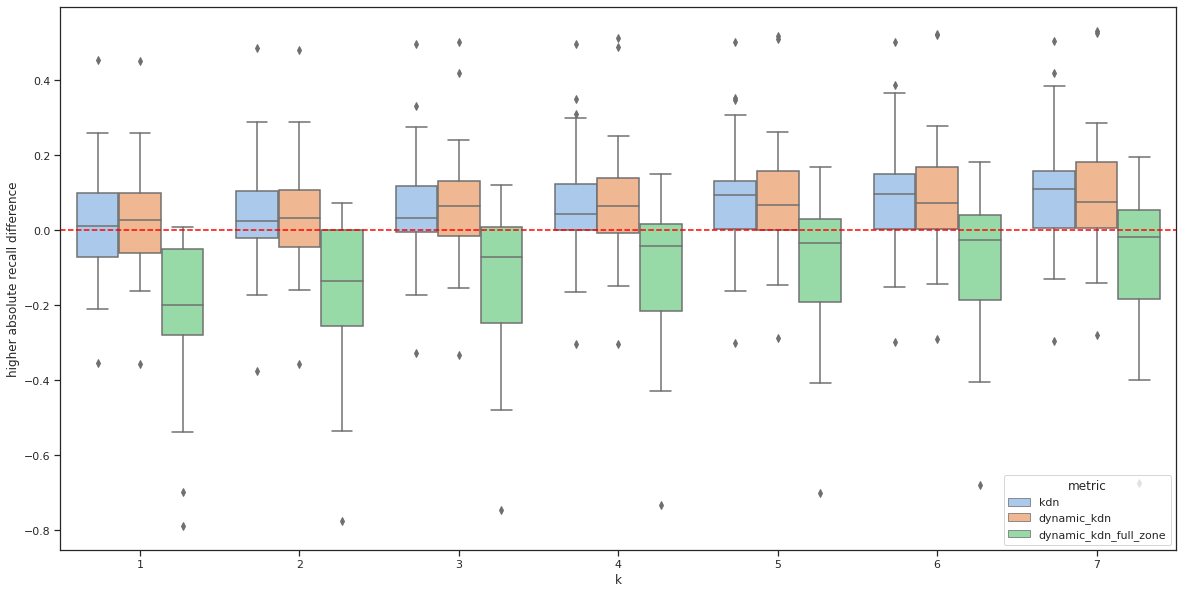

In [92]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=df, x="k", y="higher absolute recall difference", hue="metric")
plt.axhline(0, ls='--', c='red');

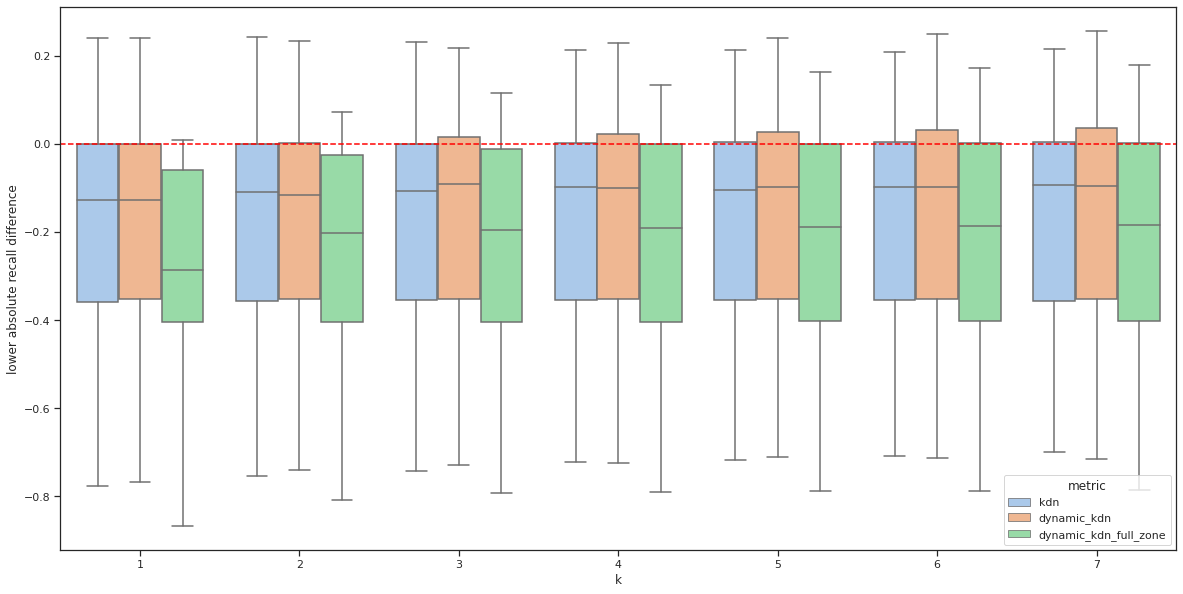

In [93]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=df, x="k", y="lower absolute recall difference", hue="metric")
plt.axhline(0, ls='--', c='red');

In [94]:
def annotate(data, regressor='kdn'):
    slope, intercept, r, p, std_err = st.linregress(data[regressor],data['score'])
    ax = plt.gca()
    plt.text(.05, .85, f'r={r:.2f}, p={p:.2g}',
            transform=ax.transAxes)
    plt.text(.05, .95, f'y={intercept:.2f} + {slope:.2f} ({std_err:.2f})x ',
            transform=ax.transAxes)
    plt.show()

In [95]:
def plot_reg(k, metric, score):
    df_corr = df[(df['k'] == k) & (df['metric'] == metric)]
    g = sns.lmplot(x=score, y='score', data=df_corr)
    annotate(df_corr, score)

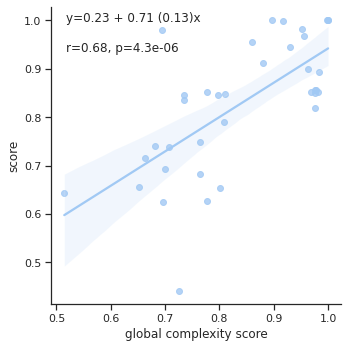

In [96]:
plot_reg(1, 'kdn', 'global complexity score')

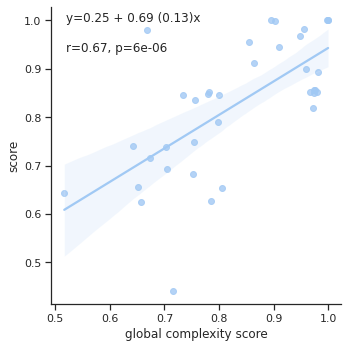

In [97]:
plot_reg(2, 'kdn', 'global complexity score')

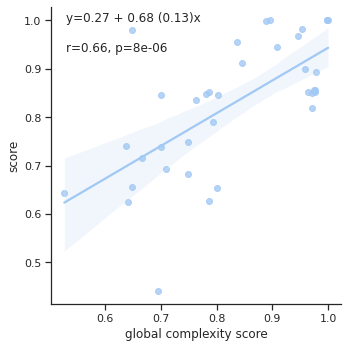

In [98]:
plot_reg(3, 'kdn', 'global complexity score')

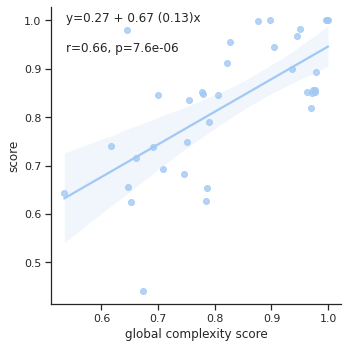

In [99]:
plot_reg(4, 'kdn', 'global complexity score')

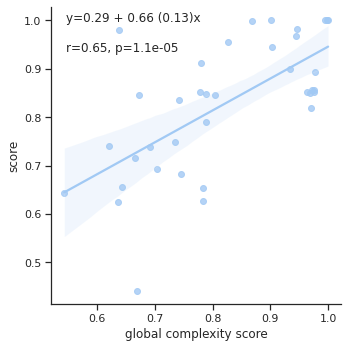

In [100]:
plot_reg(5, 'kdn', 'global complexity score')

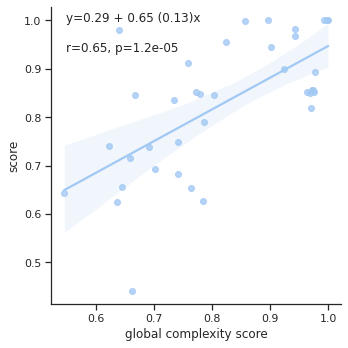

In [101]:
plot_reg(6, 'kdn', 'global complexity score')

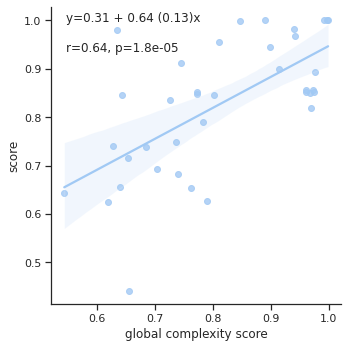

In [102]:
plot_reg(7, 'kdn', 'global complexity score')

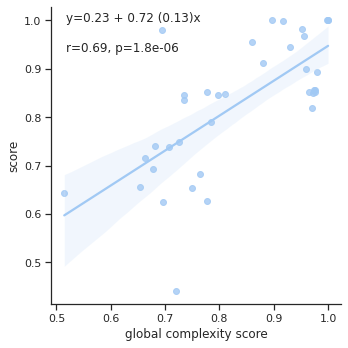

In [103]:
plot_reg(1, 'dynamic_kdn', 'global complexity score')

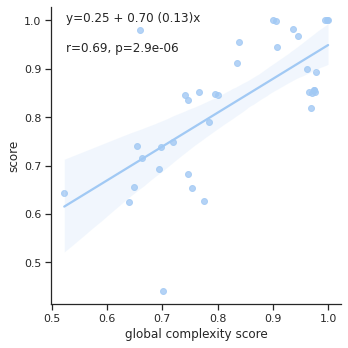

In [104]:
plot_reg(2, 'dynamic_kdn', 'global complexity score')

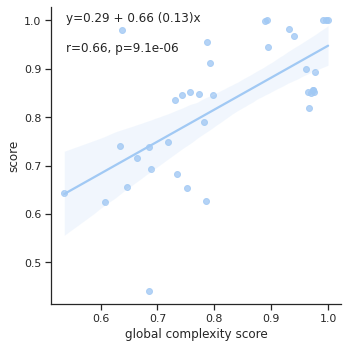

In [105]:
plot_reg(3, 'dynamic_kdn', 'global complexity score')

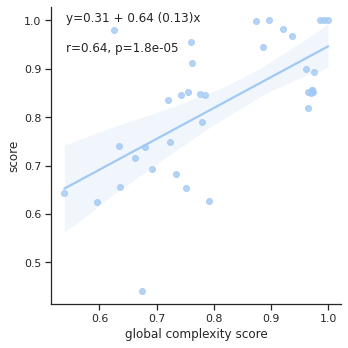

In [106]:
plot_reg(4, 'dynamic_kdn', 'global complexity score')

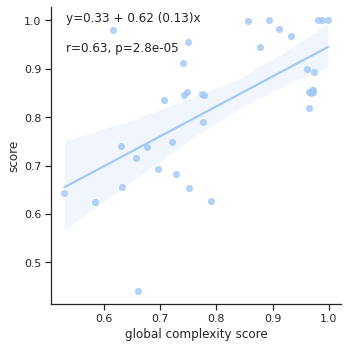

In [107]:
plot_reg(5, 'dynamic_kdn', 'global complexity score')

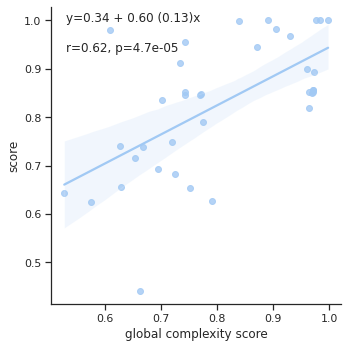

In [108]:
plot_reg(6, 'dynamic_kdn', 'global complexity score')

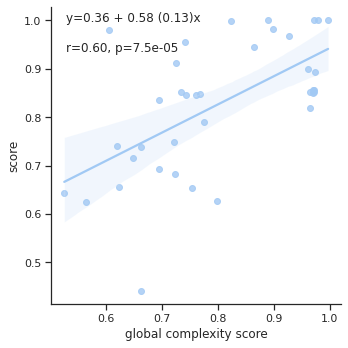

In [109]:
plot_reg(7, 'dynamic_kdn', 'global complexity score')

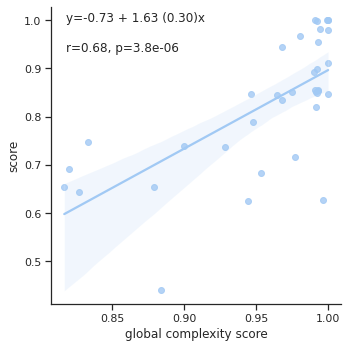

In [110]:
plot_reg(1, 'dynamic_kdn_full_zone', 'global complexity score')

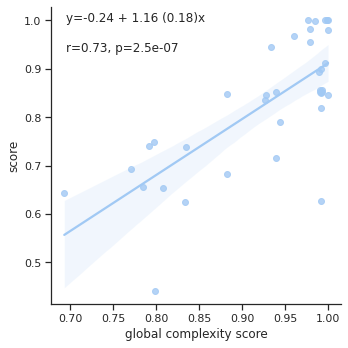

In [111]:
plot_reg(2, 'dynamic_kdn_full_zone', 'global complexity score')

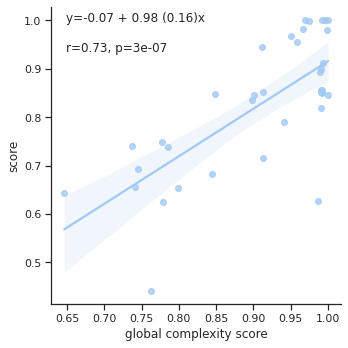

In [112]:
plot_reg(3, 'dynamic_kdn_full_zone', 'global complexity score')

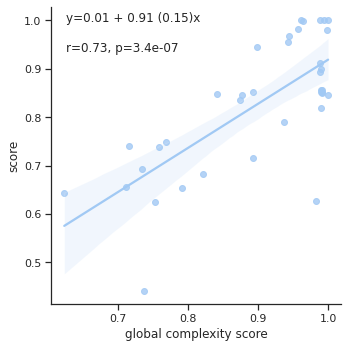

In [113]:
plot_reg(4, 'dynamic_kdn_full_zone', 'global complexity score')

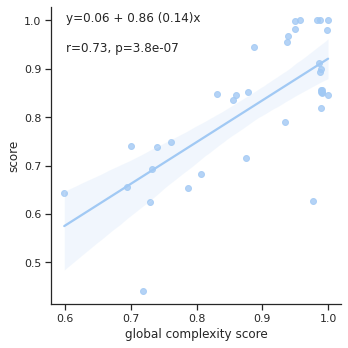

In [114]:
plot_reg(5, 'dynamic_kdn_full_zone', 'global complexity score')

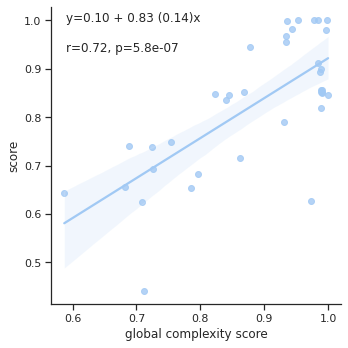

In [115]:
plot_reg(6, 'dynamic_kdn_full_zone', 'global complexity score')

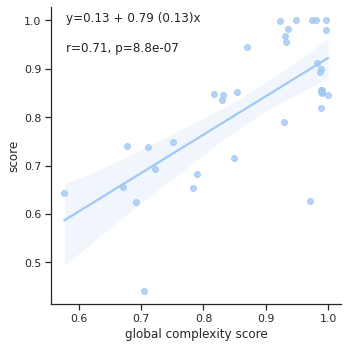

In [116]:
plot_reg(7, 'dynamic_kdn_full_zone', 'global complexity score')

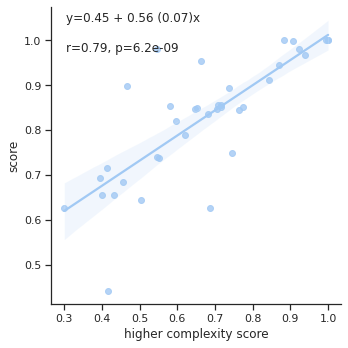

In [117]:
plot_reg(1, 'kdn', 'higher complexity score')

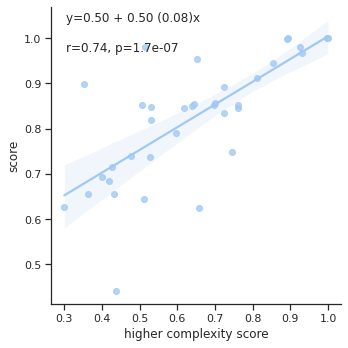

In [118]:
plot_reg(2, 'kdn', 'higher complexity score') Dslab2022:

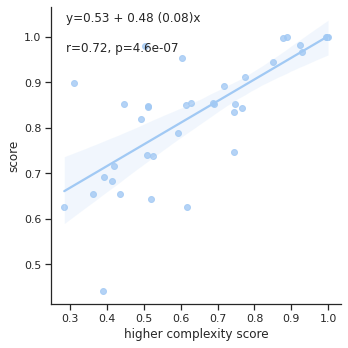

In [119]:
plot_reg(3, 'kdn', 'higher complexity score')

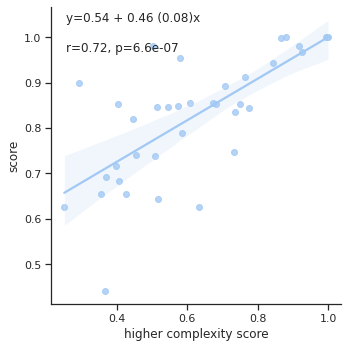

In [120]:
plot_reg(4, 'kdn', 'higher complexity score')

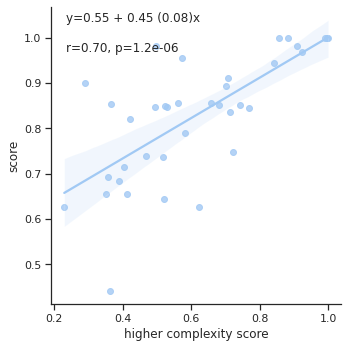

In [121]:
plot_reg(5, 'kdn', 'higher complexity score')

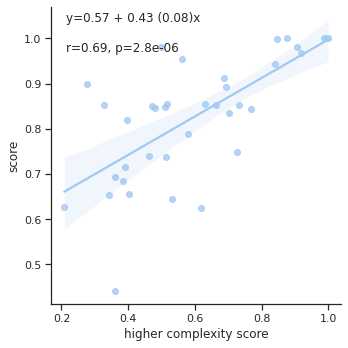

In [122]:
plot_reg(6, 'kdn', 'higher complexity score')

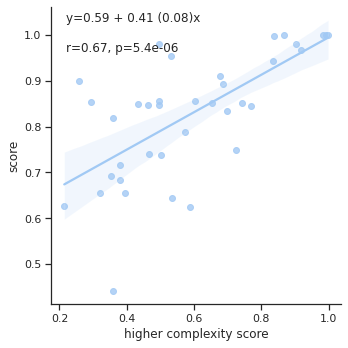

In [123]:
plot_reg(7, 'kdn', 'higher complexity score')

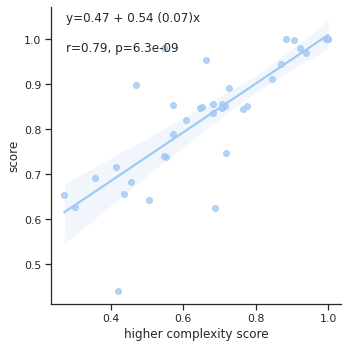

In [124]:
plot_reg(1, 'dynamic_kdn', 'higher complexity score')

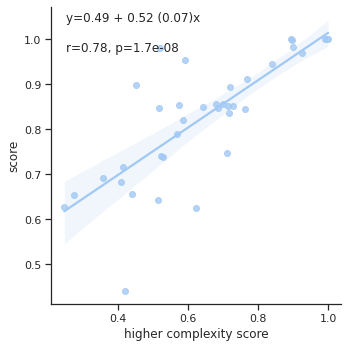

In [125]:
plot_reg(2, 'dynamic_kdn', 'higher complexity score')

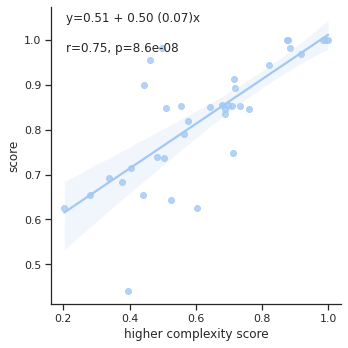

In [126]:
plot_reg(3, 'dynamic_kdn', 'higher complexity score')

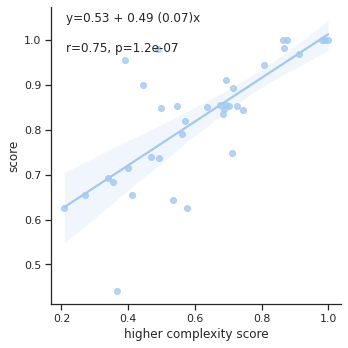

In [127]:
plot_reg(4, 'dynamic_kdn', 'higher complexity score')

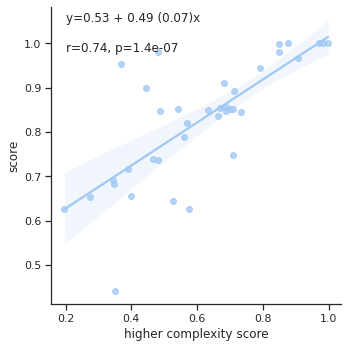

In [128]:
plot_reg(5, 'dynamic_kdn', 'higher complexity score')

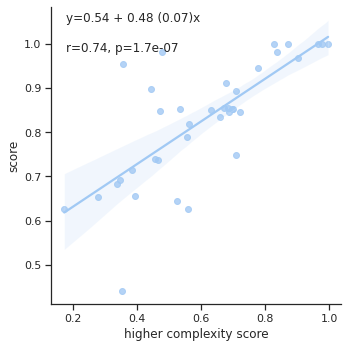

In [129]:
plot_reg(6, 'dynamic_kdn', 'higher complexity score')

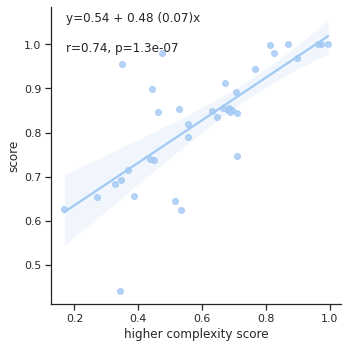

In [130]:
plot_reg(7, 'dynamic_kdn', 'higher complexity score')

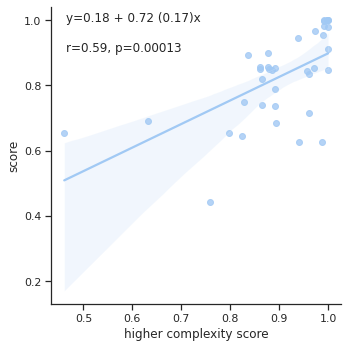

In [131]:
plot_reg(1, 'dynamic_kdn_full_zone', 'higher complexity score')

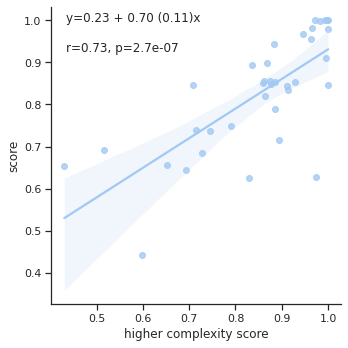

In [132]:
plot_reg(2, 'dynamic_kdn_full_zone', 'higher complexity score')

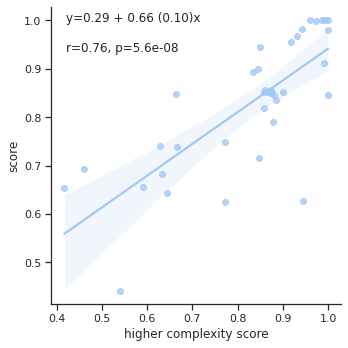

In [133]:
plot_reg(3, 'dynamic_kdn_full_zone', 'higher complexity score')

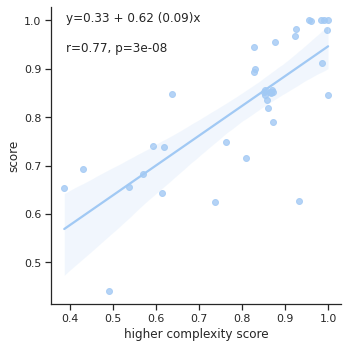

In [134]:
plot_reg(4, 'dynamic_kdn_full_zone', 'higher complexity score')

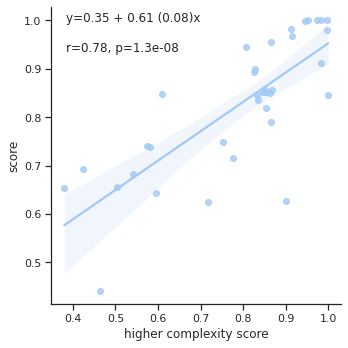

In [135]:
plot_reg(5, 'dynamic_kdn_full_zone', 'higher complexity score')

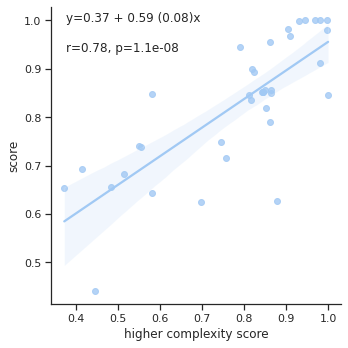

In [136]:
plot_reg(6, 'dynamic_kdn_full_zone', 'higher complexity score')

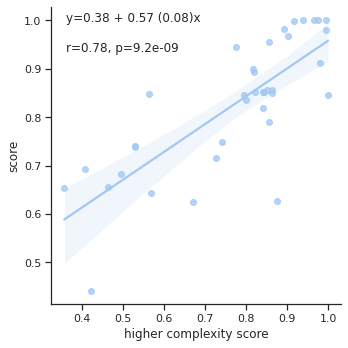

In [137]:
plot_reg(7, 'dynamic_kdn_full_zone', 'higher complexity score')

In [138]:
def scorr(k, metric, class_complexity, score='score'):
    df_corr = df[(df['k'] == k) & (df['metric'] == metric)]
    return st.spearmanr(df_corr[score], df_corr[class_complexity])[0]

In [139]:
for i in range(1, 8):
    print(scorr(i, 'kdn', 'global complexity score'))

0.6932385122037518
0.6907841328635966
0.6949354798159019
0.6868700057371374
0.6776184325291427
0.6752462342706825
0.6647293515613076


In [140]:
for i in range(1, 8):
    print(scorr(i, 'dynamic_kdn', 'global complexity score'))

0.7100831167097295
0.7085756198020476
0.6928005013832877
0.6642155123688428
0.6461868056045457
0.6459495857786997
0.6357491332673211


In [141]:
for i in range(1, 8):
    print(scorr(i, 'dynamic_kdn_full_zone', 'global complexity score'))

0.7008070258723
0.6720437666217614
0.6786859217454498
0.6669435403660721
0.6463054155174688
0.6428657280427014
0.635156083702706


In [142]:
for i in range(1, 8):
    print(scorr(i, 'kdn', 'higher complexity score'))

0.7813298070546632
0.7365675592518776
0.717751125320748
0.7092872792795858
0.6974262879872849
0.6696715683633012
0.6544894995091562


In [143]:
for i in range(1, 8):
    print(scorr(i, 'dynamic_kdn', 'higher complexity score'))

0.7808553392805296
0.7791485179912372
0.7416677855075668
0.727434595956806
0.7300440140411121
0.7314673329961882
0.7378722682940306


In [144]:
for i in range(1, 8):
    print(scorr(i, 'dynamic_kdn_full_zone', 'higher complexity score'))

0.6204604794683123
0.7027637340688203
0.7251810076112688
0.7406002962912598
0.7490216001087933
0.7564940246229428
0.7614756409657091


In [145]:
for i in range(1, 8):
    print(scorr(i, 'kdn', 'global complexity score', 'recall'))

0.34340338766773393
0.33802174488812686
0.3450243021031548
0.34431217764060956
0.33410506034412824
0.3383778071193995
0.32474800323899494


In [146]:
for i in range(1, 8):
    print(scorr(i, 'dynamic_kdn', 'global complexity score', 'recall'))

0.3728413552244564
0.35226423413903113
0.33268081141903777
0.30953676638631844
0.29078415553929454
0.28579928430147805
0.2684709223795446


In [147]:
for i in range(1, 8):
    print(scorr(i, 'dynamic_kdn_full_zone', 'global complexity score', 'recall'))

0.447004430011833
0.35891072912278643
0.3433626783572159
0.32152419483916284
0.28413766055553924
0.2749987299528757
0.2659784867606364


In [148]:
for i in range(1, 8):
    print(scorr(i, 'kdn', 'higher complexity score', 'recall'))

0.7852824522767508
0.7857106570082164
0.7985762301871191
0.796155149125546
0.806124891601179
0.7973420232297882
0.7959177743046977


In [149]:
for i in range(1, 8):
    print(scorr(i, 'dynamic_kdn', 'higher complexity score', 'recall'))

0.7801785911147344
0.7783520375619157
0.7633974238484664
0.7455943122848361
0.7406094410470196
0.7435766263076247
0.7321826349069013


In [150]:
for i in range(1, 8):
    print(scorr(i, 'dynamic_kdn_full_zone', 'higher complexity score', 'recall'))

0.6611247773315287
0.6549171307207459
0.6628691872191673
0.633316022023541
0.6159876601016077
0.5955734255086449
0.5993714226422194
